In [2]:
# Load the data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
data = pd.read_csv('user_measurements.csv')

# Extract features and labels
features = data[
['weight' , 'age' , 'height']]
labels = data['size']
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [3]:
# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster information to the dataset
data['cluster'] = clusters

In [4]:
# Create a mapping of clusters to sizes
cluster_size_mapping = data.groupby('cluster')['size'].agg(lambda x: x.value_counts().index[0])

# Function to predict size based on a new user’s measurements
def predict_size(new_measurement):
    scaled_measurement = scaler.transform([new_measurement])
    cluster = kmeans.predict(scaled_measurement)[0]
    return cluster_size_mapping[cluster]

# Example prediction
new_user_measurements = [65 , 23 , 160]  # Replace with actual measurements
predicted_size = predict_size(new_user_measurements)
print(f'Predicted Size: {predicted_size}')

Predicted Size: M


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 466.4 kB/s eta 0:00:16
   -- ------------------------------------- 0.5/7.8 MB 466.4 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/7.8 MB 689.9 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/7.8 MB 818.6 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 892.3 kB/s eta 0:00:08
   --------- ------------------------------ 1.8/7.8 MB 977.5 kB/s eta 0:00:07
   ------------ --------------------------- 2.4/7.8 MB 1.1 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/7.8 MB 1.2 MB/s eta 0:00:05
   ---------------- ----------------------- 3.1/7.8 MB 1.2 MB/s eta 0:00:04
   ------------------ ------

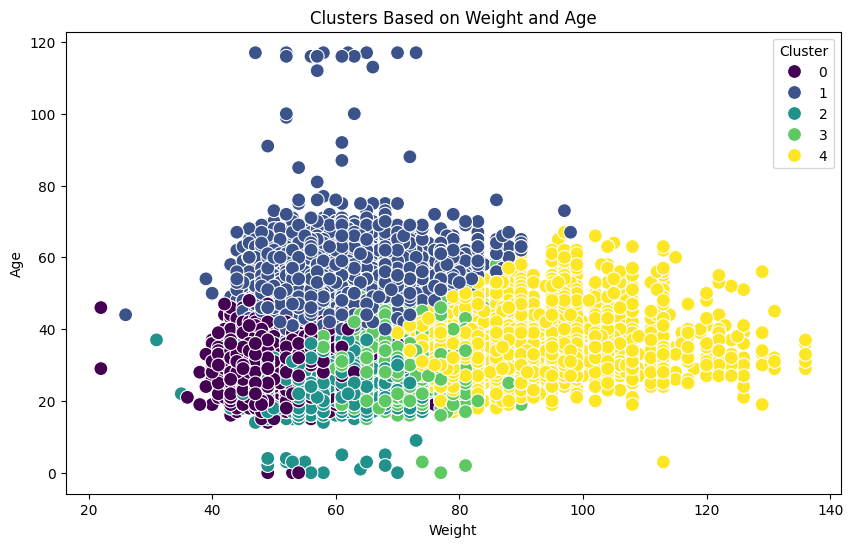

In [5]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of two features colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_imputed[:, 0], y=features_imputed[:, 1], hue=data['cluster'], palette='viridis', s=100)
plt.title('Clusters Based on Weight and Age')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()